## Final Project: Data visualisation and analysis of social responsibilities of global warming in terms of CO2 emissions and average temperature

### _by Kathrine Schultz-Nielsen (s183929), David Ribberholt Ipsen (s164522), Hanlu He (s183909)_
---
_Course: 02806 - **Social data analysis and visualization spring 2022**_ <br>
_Course responsible: **Sune Lehmann Jørgensen**_ <br>
_DTU - **Technical University of Denmark**_
---

## Table of Contents:
- [__Part 1: Introduction and Motivation__](#1.)<br><br>
- [__Part 2: Dataset segmentation and cleaning__](#2.)<br><br>
- [__Part 3: Descriptive statistics about the dataset__](#3.)
    - [3.1. <u>Our world in data CO2 emissions database</u>](#3.1.)
    - [3.2. <u>Climate Change: Earth Surface Temperature Data</u>](#3.2.)<br><br>
- [__Part 4: The apparent problem: The Earth is heating up__](#4.)<br><br>
- [__Part 5: What is Causing global warming?__](#5.)
    - [5.1. <u>Population growth</u>](#5.1.)
    - [5.2. <u>Energy consumption</u>](#5.2.)
    - [5.3. <u>Human activities and Wealth (GDP)</u>](#5.3.)<br><br>
- [__Part 6: Who is responsible?__](#6.)
    - [6.1. <u>Who emmitted most CO2 in total?</u>](#6.1.)
    - [6.2  <u>Looking at people instead of countries</u>](#6.2.)<br><br>
- [__Part 7: Looking into the future__](#7.)
    - [7.1. <u></u>](#7.1.)
    - [7.2. <u></u>](#7.2.)<br><br>
- [__Part 8: Discussion__](#8.)<br><br>
- [__Part 9: Contributions__](#9.)<br><br>
---

<a id='1.'></a>
## 1. Introduction and Motivation

Global warming is no longer a problem we can look the other way and threat on the earth's ecosystem, subsequently our survival increases as we speak. CO2 emission is what most considers as the primary driver for climate change for its impact on increasing average temperature of the earth. The amount of atmospheric concentration of carbon dioxide has increased by 50% since the industrilisation era due to human activities \[1\]. With increasing living standards over the past decades were a result of us exploiting non-renewable enegry sources such as coal, oil and natural gas, lack of awareness of sustainable infrastructure design in urbanization processes and rapid population growth \[2\]. And we are already facing many of the consequences of global warming such as ice sheets melting, more frequent forest wildfires, rising sea level, more intense heat waves and appearence of more extreme temperatures \[3\]. These changes are esimtated to be irreversible even 1000 years after if we manage to stop CO2 emissions \[4\]. We have slowly came to realise the seriousenss of the issue and began drawing out plans to slow down the rising temperature. The paris agreement in 2015 is the largest agreement that binded 196 countries in the world to take actions against global warming, with the ambitious goal of limiting temperature increase to 1.5 degree celcius \[5\]. In this project we will be presenting the global warming trend with CO2 emissions and global recorded temperature data, assessing contribution of various social factors to CO2 emissions, dig deeper into nation-wise responsibilities for CO2 emissions and lastly looking into the future of temperature rise based on current climate change mitigation policies.

---

We will be working primarily with two databases/sets for this project, subsets from [Our World in Data CO2 and Greenhouse Gas Emissions database](https://ourworldindata.org/co2-and-other-greenhouse-gas-emissions), and the [Climate Change: Earth Surface Temperature Data](https://www.kaggle.com/datasets/berkeleyearth/climate-change-earth-surface-temperature-data). The reason for choosing the two datasets is because to assess the impact of global warming interms of CO2 emissions and rising temperature requires extensive information in the geographical and time domain, as the matter concerns all of us no matter where we are from and comparison of the past to the present so we can look into the future. And the two datasets do exactly that, with: 

The _Our Wolrd in Data CO2 and Greenhouse Gas Emission database_ from which we selected 4 sub datasets: First having 21591 records of CO2 emissions and various relevant variables such as energy consumption, gdp, population, CO2 emissions by industrial sector etc. for 243 countries and regions with the earliest record from 1750 and newest from 2020. Second containing 5655 records on CO2 emissions for all countries by sectors from 1990 to 2018. Third and fourth contains 62059 records each, of countries' annual and cumulative CO2 emissions from 1750 to 2020.*

The _Climate Change: Earth Surface Temperature Data_ contains a collection data files with 8 million+ records of average temperature by cities and countries around the world. 

Therefore, we believe the two datasets compliments well with each other to provide us with sufficient information for our visualisations

---

To tell our story, we aim to find a balance between author driven and user driven narrative with interactive slide shows and annotated graphs. In this way, we are able to present the facts as well as allowing the users to make up their own opinion on the what, why and how of global warming, as considerable number of factors and nations are involved. 

<a id='2.'></a>
## 2. Dataset segmentation and cleaning

Before we delve into the deeper analysis of this project, let us import all the necessary libraries for this project:

In [450]:
# Basic libraries

import numpy as np
import pandas as pd
import json
import matplotlib.pyplot as plt
import seaborn as sns
import math
import time
import itertools
sns.set_theme()
scale = 1.1 ; width=scale*1000;

import warnings
warnings.filterwarnings('ignore')

In [451]:
# helper 
from countryinfo import CountryInfo
import pycountry_convert as pc

def country_to_continent(country_code):
    try:
        country_alpha2 = pc.country_alpha3_to_country_alpha2(country_code)
        country_continent_code = pc.country_alpha2_to_continent_code(country_alpha2)
        country_continent_name = pc.convert_continent_code_to_continent_name(country_continent_code)
    except: 
        country_continent_name = country_code
        
    return country_continent_name

def countryname_to_continent(country_name):
    try:
        country_code = pc.country_name_to_country_alpha2(country_name, cn_name_format="default")
        country_continent_code = pc.country_alpha2_to_continent_code(country_code)
        country_continent_name = pc.convert_continent_code_to_continent_name(country_continent_code)
    except: 
        country_continent_name = country_name
        
    return country_continent_name

In [452]:
# Display libraries

from IPython.display import IFrame, display
from IPython.core.display import display as disp, HTML
from ipywidgets import widgets, interact, interactive, fixed, interact_manual

from plotly import __version__
import plotly.express as px
import plotly.offline as pyo
import plotly.express as px
import plotly.io as pio
import plotly.graph_objects as go
from plotly.subplots import make_subplots

pio.renderers.default = 'notebook'

Now, we will proceed to filtering, subsetting and cleaning the original datasets
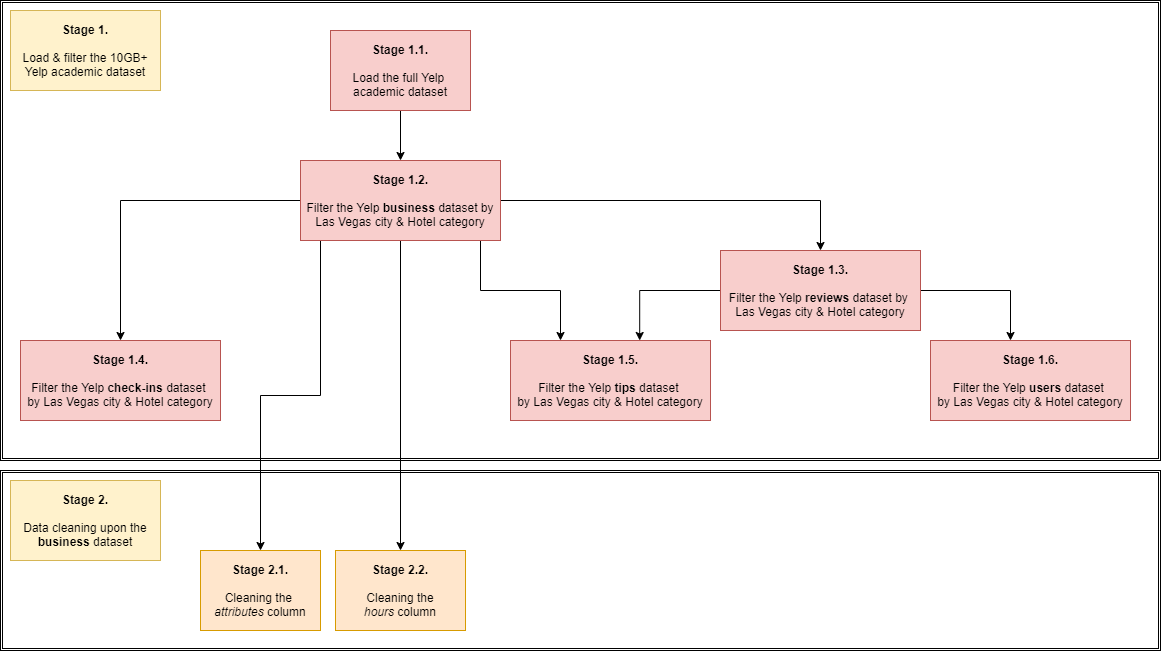

### Filtering & subsetting the full dataset

In this section we will load and prepare the datasets and segment them for different purpose of visualisations.

Our world in data co2 emissions database is relatively clean hence minimal cleaning is done and we have converted iso_code to continent name for visualisations on continent level later.

In [576]:
# load our world in data database 
df_co2 = pd.read_csv('data/owid-co2-data.csv',sep = ',',encoding = 'unicode_escape')
## convert country code to continent 
df_co2['continent'] = df_co2['iso_code'].apply(lambda x: country_to_continent(x))

## keeping the columns relevant for our visualisations 

columns = ['iso_code', 'country', 'continent', 'year', 'co2', 'co2_per_capita','population', 'gdp','co2_per_gdp','share_global_co2', 'energy_per_capita','cement_co2', 'coal_co2', 
'flaring_co2', 'gas_co2', 'oil_co2','other_industry_co2', 'cement_co2_per_capita', 'coal_co2_per_capita','flaring_co2_per_capita', 'gas_co2_per_capita', 
'oil_co2_per_capita', 'other_co2_per_capita'] 

df_co2 = df_co2[columns]

For the purpose of visualisations we only kept the emissions by sector data for 2018 and again extracted continent names from country codes.

In [555]:
# load climate watch emissions by sector dataset 
df_sector = pd.read_csv('data/co-emissions-by-sector.csv',sep = ',',encoding = 'unicode_escape')
## convert country code to continent names
df_sector['Continent'] = df_sector['Code'].apply(lambda x: country_to_continent(x))
## only keep 2018 data and keep columns with no missing values
df_sector_18 = df_sector[(df_sector['Year'] == 2018) & ~(df_sector['Continent'].isin([0,'TLS','OWID_WRL']))]
df_sector_18_clean = df_sector_18[~df_sector_18[['Buildings', 'Industry', 'Other fuel combustion', 'Transport',
       'Manufacturing and construction', 'Fugitive emissions',
       'Electricity and heat']].eq(0).all(axis = 1)].drop(columns = ["Year","Code","Land-use change and forestry"])

Katherine

In [477]:
df_region_annual = pd.read_csv('data/annual-co-emissions-by-region.csv')
remove_list = ['Asia (excl. China & India)','Asia','EU-27','EU-28','Europe (excl. EU-27)','Europe (excl. EU-28)','Oceania','North America','North America (excl. USA)', 'World', 'High-income countries', 'European Union', 'Upper-middle-income countries', 'European Union (27)', 'European Union (28)', 'Africa', 'South America', 'Lower-middle-income countries','International transport','Europe', 'Low-income countries']
df_region_annual = df_region_annual[~df_region_annual['Entity'].isin(remove_list)]
df_region_annual = df_region_annual.sort_values('Annual CO2 emissions (zero filled)', ascending = False)
df_region_annual = df_region_annual.rename(columns={'Annual CO2 emissions (zero filled)': "Annual CO2 emissions"})

df_region_cum = pd.read_csv('data/cumulative-co2-emissions-region.csv')
remove_list = ['Asia (excl. China & India)','Asia','EU-27','EU-28','Europe (excl. EU-27)','Europe (excl. EU-28)','Oceania','North America','North America (excl. USA)', 'World', 'High-income countries', 'European Union', 'Upper-middle-income countries', 'European Union (27)', 'European Union (28)', 'Africa', 'South America', 'Lower-middle-income countries','International transport','Europe', 'Low-income countries']
df_region_cum = df_region_cum[~df_region_cum['Entity'].isin(remove_list)]
df_region_cum = df_region_cum.sort_values('Cumulative CO2 emissions (zero filled)', ascending = False)
df_region_cum = df_region_cum.rename(columns={'Cumulative CO2 emissions (zero filled)': "Cumulative CO2 emissions"})

David

In [456]:
# load Earth surface temperature dataset
# Load data (city)
df = pd.read_csv('data/GlobalLandTemperaturesByCity.csv')

df['dt'] = pd.DatetimeIndex(df['dt'])
df['Year'] = pd.DatetimeIndex(df['dt']).year
df = df[df['Year'] != 1743]
df = df[df['Year'] != 2013]

# For each country average all AverageTemperature values and add iso_alpha to countries
df_avg = pd.DataFrame({'AverageTemperature': df.groupby('Country')['AverageTemperature'].mean(), 'Country': df.groupby('Country')['Country'].first()})
df_avg = df_avg.reset_index(drop=True)
#print('Average country temperature df: ', df_avg)

df_avg_city = pd.DataFrame({'AverageTemperature': df.groupby('City')['AverageTemperature'].mean(), 'City': df.groupby('City')['City'].first()})
df_avg_city = df_avg_city.reset_index(drop=True)
#print('\n \n Average city temperature df: ', df_avg_city)

# For each Country for each Year average all AverageTemperature values
D1 = df.groupby(['Year', 'Country'])['AverageTemperature'].mean().reset_index()
meantemp = D1.groupby('Year')['AverageTemperature'].mean().reset_index() # Rough - er ren average.

# Normalize temperature relative to median
mediantemp = D1.groupby('Country')['AverageTemperature'].median()
df.groupby(['Year','Country'])['AverageTemperature'].mean().reset_index()['AverageTemperature']
#temp.columns = ['Year', 'Country', 'mean','median']
#D1['NormalizedTemperature'] = temp['mean'] - temp['median']
df

# Calculate normalized temperatures AND mean temperatures relative to country size
import copy
D2 = copy.deepcopy(D1)
normies = np.array([])
for country in D2['Country'].unique():
    norm = np.array(D2.groupby('Country')['AverageTemperature'].get_group(country) - D2.groupby('Country')['AverageTemperature'].get_group(country).median())
    normies = np.append(normies, norm)
D2['NormalizedTemperature'] = normies


areadict = {}
# get all countryies from CountryInfo
for country in D2['Country'].unique():
    try:
        areadict[country] = int(CountryInfo(country).area())
    except:
        pass
        #print("Didn't work for ", country)

# Impute missing values to median
for country in D2['Country'].unique():
    try:
        CountryInfo(country).area()
    except:
        areadict[country] = int(np.median(list(areadict.values())))

D2['Area'] = D2['Country'].map(areadict)

# For each year, calculate the sum of Area
areasum = D2.groupby('Year')['Area'].sum()

# For each year, divide Area by areasum corresponding to each year
D2['AreaRatio'] = D2.groupby('Year')['Area'].apply(lambda x: x / areasum[x.name])

# For each year, sum (arearatio * AverageTemperature for each country)
#D2.groupby('Year')['AreaRatio'].apply(lambda x: x * D2['AverageTemperature']).sum()
meantemprelative = np.zeros(len(D2['Year'].unique()))
for i, year in enumerate(D2['Year'].unique()):
    meantemprelative[i] = np.sum(D2[D2.Year == year]['AreaRatio'] * D2[D2.Year == year]['AverageTemperature'])
meantemprelative1900 = meantemprelative[156:] # 1900-2012


--- 
<a id='3.'></a>
## 3. Descriptive statistics about the dataset

After the segmentation and cleaning has been performed, let us try to understand our datasets a little bit better. 

<a id='3.1'></a>
### 3.1 Our world in data CO2 emissions database

**First subset**

In [578]:
df_co2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25191 entries, 0 to 25190
Data columns (total 23 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   iso_code                21960 non-null  object 
 1   country                 25191 non-null  object 
 2   continent               21960 non-null  object 
 3   year                    25191 non-null  int64  
 4   co2                     23949 non-null  float64
 5   co2_per_capita          23307 non-null  float64
 6   population              22892 non-null  float64
 7   gdp                     13538 non-null  float64
 8   co2_per_gdp             15389 non-null  float64
 9   share_global_co2        23949 non-null  float64
 10  energy_per_capita       8681 non-null   float64
 11  cement_co2              12248 non-null  float64
 12  coal_co2                17188 non-null  float64
 13  flaring_co2             4382 non-null   float64
 14  gas_co2                 8845 non-null 

As we can see the first subset has 25191 entries and 22 variables which we have selected to be of interes to us:

- **iso_code**, iso code that uniquely identifies a country
- **country**, country name, also including continents and unions
- **year**, year of observation
- **co2**, annual CO2 emissions in million tonnes 
- **co2_per_capita**, CO2 emissions per capita in tonnes 
- **population**, population of a country/region
- **gdp**, Gross Domestic Product (GDP) of a country/region in US dollars ($)
- **co2_per_gdp**, CO2 emissions per gdp in million tonnes 
- **share_global_co2**, annual percentage share of co2 emissions a country/region have of the world's total CO2 emissions 
- **energy_per_capita**, energy use per person in kWh (kilowatt hours)
- **cement_co2**, annual CO2 emissions coming from cement production in billion tonnes 
- **coal_co2**, annual CO2 emissions coming from burning coal in billion tonnes 
- **flaring_co2**, annual CO2 emissions from flaring in billion tonnes 
- **gas_co2**, annual CO2 emissions from burning gas in billion tonnes 
- **oil_co2**, annual CO2 emissions from oil extraction in billion tonnes 
- **other_industry_co2**, annual CO2 emissions from other industries in billion tonnes 
- **cement_co2_per_capita**, annual CO2 emissions from cement production per capita in tonnes      
- **coal_co2_per_capita**, annual CO2 emissions from coal production per capita in tonnes    
- **flaring_co2_per_capita**, annual CO2 emissions from flaring production per capita in tonnes  
- **gas_co2_per_capita**, annual CO2 emissions from gas production per capita in tonnes         
- **oil_co2_per_capita**, annual CO2 emissions from oil production per capita in tonnes          
- **other_co2_per_capita**, annual CO2 emissions from other industrial productions per capita in tonnes          

Now let's take a look at how much missing data we have. 

In [579]:
total = df_co2.isnull().sum().sort_values(ascending=False)
percent = round(df_co2.isnull().sum()/df_co2.isnull().count()*100,1).sort_values(ascending=False)
missing_data = pd.concat([total,percent],axis = 1, keys = ['Total missing','%'])
missing_data

Total missing     %
other_co2_per_capita            23192  92.1
other_industry_co2              23192  92.1
flaring_co2_per_capita          20810  82.6
flaring_co2                     20809  82.6
energy_per_capita               16510  65.5
gas_co2_per_capita              16356  64.9
gas_co2                         16346  64.9
cement_co2_per_capita           12973  51.5
cement_co2                      12943  51.4
gdp                             11653  46.3
co2_per_gdp                      9802  38.9
coal_co2_per_capita              8331  33.1
coal_co2                         8003  31.8
oil_co2_per_capita               5010  19.9
oil_co2                          4652  18.5
continent                        3231  12.8
iso_code                         3231  12.8
population                       2299   9.1
co2_per_capita                   1884   7.5
share_global_co2                 1242   4.9
co2                              1242   4.9
country                             0   0.0
year                                0   0.0

As we can see there are significant amount of missing data for alot of the columns with informaiton on CO2 emissions for different fuel types. However, this does not raise a big concern as the data ranges from 1750 to 2020, meaning that alot of fuel type didn't exist and many countries have not been established back then. And we can see this with the bar plot below showing the decrease of average percentage of missing data over the years. 

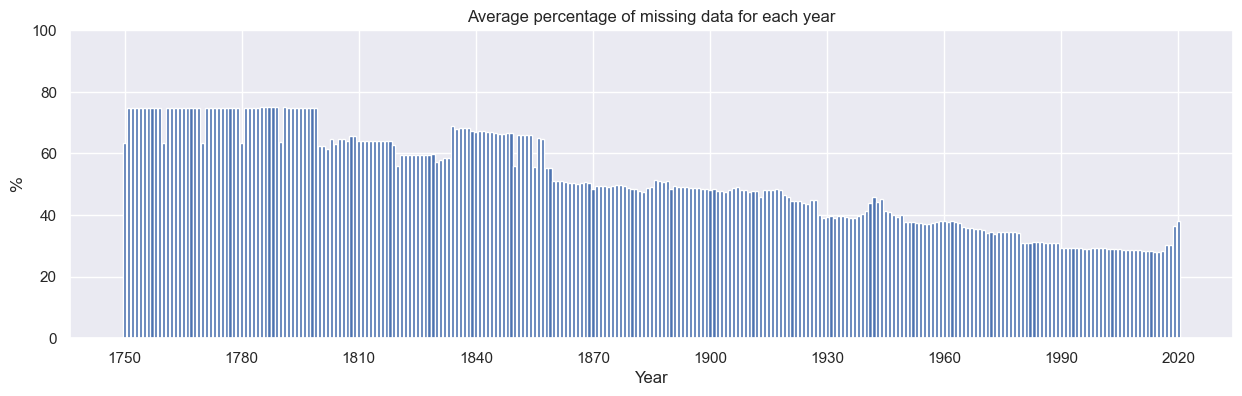

In [580]:
missing_years = {x:[] for x in list(set(df_co2.year))}
for year in list(set(df_co2.year)):
    total = df_co2[df_co2['year'] == year].isnull().sum().sort_values(ascending=False)
    percent_avg = np.mean((df_co2[df_co2['year'] == year].isnull().sum()/df_co2[df_co2['year'] == year].isnull().count()*100))
    missing_years[year] = percent_avg
keys = list(missing_years.keys())
# get values in the same order as keys, and parse percentage values
vals = [missing_years[k] for k in keys]
plt.figure(figsize=(15,4))
# Create bars
plt.bar(keys, vals)
# Create names on the x-axis
plt.xticks(np.linspace(1750,2020,10,dtype=int), np.linspace(1750,2020,10,dtype=int))
plt.title('Average percentage of missing data for each year')
plt.xlabel('Year')
plt.ylim(0,100)
plt.ylabel('$\%$')
plt.show()

**Second subset**

This subset of data we have contains records of CO2 emissions for 193 countries by sector for the year 2018. And the sectors included in the analysis are: 

- **Buildings**, energy related emissions from energy use in buildings
- **Transport**, indirect and direct emissions from fossil fuel burning for powering transport activities
- **Manufacturing and construction**, emissions from energy use in manufacturing and constructios
- **Fugitive emissions**, accidental leakage of CO2 from industrial processes and transportation
- **Electricity and heat**, emissions from electricity and heat productions
- **Industry**, direct emissions from industrial processes
- **Other fuel combustion**

In [560]:
df_sector_18_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 193 entries, 28 to 5654
Data columns (total 9 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Entity                          193 non-null    object 
 1   Buildings                       190 non-null    float64
 2   Industry                        191 non-null    float64
 3   Other fuel combustion           190 non-null    float64
 4   Transport                       190 non-null    float64
 5   Manufacturing and construction  190 non-null    float64
 6   Fugitive emissions              54 non-null     float64
 7   Electricity and heat            190 non-null    float64
 8   Continent                       192 non-null    object 
dtypes: float64(7), object(2)
memory usage: 15.1+ KB


In [569]:
total = df_sector_18_clean.isnull().sum().sort_values(ascending=False)
percent = round(df_sector_18_clean.isnull().sum()/df_sector_18_clean.isnull().count()*100,1).sort_values(ascending=False)
missing_data_sector = pd.concat([total,percent],axis = 1, keys = ['Total missing','%'])
missing_data_sector

Total missing     %
Fugitive emissions                        139  72.0
Buildings                                   3   1.6
Other fuel combustion                       3   1.6
Transport                                   3   1.6
Manufacturing and construction              3   1.6
Electricity and heat                        3   1.6
Industry                                    2   1.0
Continent                                   1   0.5
Entity                                      0   0.0

From the table above we can see that the amount of missing data is minimal, except for fugitive emissions which is not a common constributor of CO2 emisisons and hence reasonable that many countries does not have data on that.

Kathrine

**Third subset**

**Fourth subset**

<a id='3.2'></a>
### 3.2 Climate Change: Earth Surface Temperature Data (David)

--- 
<a id='4.'></a>
## 4. The apparent problem: The Earth is heating up

So what is global warming? Global warming is the increasing temperatures of the Earth's surface caused by human greenhouse gas emissions \[1\]. It is has been identified as *the biggest threat modern humans have ever faced* \[2\] and therefore countries of the world agreed in Paris in 2015 to limit the global warming to well below 2 degrees Celsius, preferably at 1.5 degrees Celsius \[3\].

Let's start with visualising the average temperatures over the years. Whenever you're ready, you can start the animation below. We also invite you to hover over individual countries with your mouse and/or drag back and forth in the years


In [454]:
## HERE IS THE MAGIC - 1
fig = px.choropleth(D2, locationmode="country names", locations="Country", color="NormalizedTemperature", animation_frame='Year',
                     hover_name="Country",
                     color_continuous_scale="balance",
                     range_color=(-1.5, 1.5),
                     projection="natural earth",
                     title = "Yearly Temperature from 1744 to 2012",
                     width=scale*1000, height=scale*600,
                     labels={"NormalizedTemperature": "temperature change [°C] (from median)"})
fig.layout.updatemenus[0].buttons[0].args[1]['frame']['duration'] = 100
fig.layout.updatemenus[0].buttons[0].args[1]['transition']['duration'] = 500
fig.show()

It seems to be the case that the very recent years are hotter than normal. However this pattern might not be as clear as one might expect. So let's average the data across countries to see if we can find a clearer indication of global warming. Temperatures are averaged relative to country sizes.

In [457]:
# Repeat for meantemp RELATIVE to country sizes
meantemprelative1900df = pd.DataFrame({'Year': np.arange(1900,2013), 'RelativeAverageTemperature': meantemprelative1900})
# 1. 
fig = px.scatter(meantemprelative1900df, x="Year", y="RelativeAverageTemperature", trendline="rolling",trendline_options=dict(window=5),
                title="Global temperature (and 5-year moving average)", labels={"Year": "Year", "RelativeAverageTemperature": "Global Temperature"})
fig.show()

Now we see a clear trend: The global temperature is increasing.

But hey! Does that have anything to do with us humans? Well... Let's have a look.

In [459]:
co2cum = pd.read_csv('data/cumulative-co2-emissions-region.csv')
co2cum = co2cum.rename(columns={'Cumulative CO2 emissions (zero filled)': "Cumulative CO2 emissions (tons)"})
co2cum = co2cum.loc[co2cum['Entity'] == 'World']
co2cum = co2cum.sort_values('Year')
meantemp1900co2cum = pd.merge(meantemprelative1900df, co2cum, left_on="Year", right_on="Year", how='inner')
meantemp1900co2cum = meantemp1900co2cum.rename(columns={'RelativeAverageTemperature': "Average Temperature (C)"})

fig = px.scatter(meantemp1900co2cum, x="Cumulative CO2 emissions (tons)", y="Average Temperature (C)",
    color="Year", color_continuous_scale="balance",
    trendline="ols", trendline_color_override="black", title="Global temperature vs. cumulated CO2 emissions", labels={'Year': 'Year', 'Average Temperature (C)': 'Global Temperature'})
fig.show()

Now compared to our CO2 emissions there is a clear increasing trend. The more CO2 we emit, the warmer it gets. If you hover over the linear fit, you will see that *according to the fit*:

<h4><center> Every time we emit 1 trillion tons of CO2, the global temperature increases with 0.95 (°C) </center></h4>

--- 
<a id='5.'></a>
## 5.  What is Causing global warming?

<a id='5.1.'></a>
### 5.1. Population growth

It is more than apparent that the world population is constantly growing, yet the resources on earth does not grow with it. Every life that comes to join the big party has demand for food, shelter, clothing, and due to advancement in technology and living standards, the list has now become extensive with Mcdonalds to michellin star, straw roof to golden roof, cheap fast fashion to luxury clothing, iphone 13 and its dupes, scooters to ferarris etc. All that demands is shouting production, production and production! Which inevitably increases fossil fuel burning and thereby CO2 emissions. It has been found that 1% of population growth mounts to 1.28% increase in average CO2 emission and thereby, results in global warming \[6\]. Let's take a look how the world's average CO2 emissions has changed with respect to population growth over the 30 years span from 1990 to 2020. 

In [587]:
## fill 
df_co2 = df_co2.fillna(0)
## select needed columns 
df_pop = df_co2[['iso_code', 'country', 'year', 'co2', 'co2_per_capita','population','continent']] 

## extract data for all countries from 1990 to 2020
df_pop_30 = df_pop[(df_pop['year'] > 1989) & (df_pop['year'] < 2021)]

world = df_pop_30[df_pop_30['country'] == 'World']
world['pop_change'] = world['population'].pct_change()*100
world['co2_change'] = world['co2'].pct_change()*100

df_world =pd.melt(world[['year','co2','population','co2_change','pop_change']],id_vars=['year'],var_name='CO2_pop', value_name='value')
df_world = df_world.fillna(0)

fig = go.Figure(
    data=[
        go.Scatter(name='CO2 emissions', x=sorted(list(set(df_world.year))), y=df_world[df_world['CO2_pop']=='co2'].value/1000, yaxis = 'y'),
        go.Scatter(name='Population', x=sorted(list(set(df_world.year))), y=df_world[df_world['CO2_pop']=='population'].value, yaxis ='y2')
    ],
    layout={
        'yaxis': {'title': 'Average CO2 emissions (billion t)'},
        'yaxis2': {'title': 'Population', 'overlaying': 'y', 'side': 'right'}
    }
)

# Change the bar mode
fig.update_layout(barmode='group',title = 'Change in worlds annual CO2 emissions and total population')

fig.show()

It is quite apparent that both the world's population and annual CO2 emissions have been increasing and the perentage change ratio between them has been greater than what was said to be 1:1.28 up until 2010. Around 2015,the increase of average CO2 emissions reached a plateu and in 2020 there is a rather significant decrease, meanwhile the population continues to grow, which is reflected in both plots. The reason for the slowed increase of CO2 emissions in 2015 is most likely due to more global efforts in tackling climate change, especially china for its tightened policies to deal with severe air pollution by burning less coal \[7\]. And in 2020, the pandemic put the world in lockdown which either halted or reduced almost all industrial activities, hence the significant drop in average CO2 emmissions. 

In [588]:
years = [1990,1995,2000,2005,2010,2015,2020]
df_world = df_world[df_world['year'].isin(years)]
## compute percentage change ratio
change_ratio = np.round(df_world[df_world['CO2_pop']=='co2_change']['value'].values/df_world[df_world['CO2_pop']=='pop_change']['value'].values,3)

fig = make_subplots(rows=1, cols=2)
fig = go.Figure(data=[
    go.Bar(name='CO2 emissions', x=years, y=df_world[df_world['CO2_pop']=='co2_change'].value),
    go.Bar(name='Population', x=years, y=df_world[df_world['CO2_pop']=='pop_change'].value),
    go.Scatter(name = 'Change ratio', x = years, y = change_ratio, text = change_ratio ,textposition="top center",mode='lines+markers+text')
],
layout={
        'yaxis': {'title': 'Percentage change (%)'}
    })
# Change the bar mode
fig.update_layout(barmode='group',title='Percentage changes of annual CO2 emissions and population')
fig.show()


<a id='5.2.'></a>
### 5.2. Energy consumption

With more people in the world and higher demand for living standards just mean that there are more mouth to feed and harder to suffice. We are consuming more and more energy as individuals. This naturally lead to higher global consumption for energy, hence we need to extract more oil, natural gas, burn more coal, and with great hope, turn more towards green energy sources like solar and wind. 

In [589]:
df_energy = df_co2[['country', 'year', 'energy_per_capita','cement_co2', 'coal_co2', 'flaring_co2', 'gas_co2', 'oil_co2',
       'other_industry_co2', 'cement_co2_per_capita', 'coal_co2_per_capita', 'flaring_co2_per_capita', 'gas_co2_per_capita', 'oil_co2_per_capita', 'other_co2_per_capita']]

## extract data for all countries from 1749 to 2019
energy = df_energy[(df_energy['year'] > 1749) & (df_energy['year'] < 2021)]

world_energy = energy[energy['country'] == 'World']

fig = px.line(world_energy[world_energy['energy_per_capita']!=0], 
        x="year", 
        y="energy_per_capita", 
        title="World Energy consumption per capita (1965-2019)",
        range_x=[1964, 2020],
        range_y= [10000, 24000], markers=True)
fig.update_layout(
    {
        'yaxis': {'title': 'kilowatt-hours (kWh)'}
    }
)

In [590]:
world_fuel = pd.melt(world_energy[['year','cement_co2', 'coal_co2', 'flaring_co2', 'gas_co2',
       'oil_co2', 'other_industry_co2']],id_vars=['year'],var_name='CO2_energy', value_name='value')
## convert to billions tonne 
world_fuel['value'] = world_fuel['value']/1000
fig = px.line(world_fuel[world_fuel['value']!= 0], 
        x="year", 
        y="value", 
        title="CO2 emissions by fuel type (1750-2019)",
        color = 'CO2_energy',labels = {'CO2_energy':'CO2 by fuel type'})
fig.update_layout(hovermode='x unified', yaxis_title= 'CO2 emissions (billion t)')
fig.show()

The production of energy of course contributes to CO2 emissions, click the **play** buttom below to see how much each fuel/energy type contribute to world's CO2 emissions. 

In [597]:
## find the total co2 emission from each energy type
world_energy['total_co2'] = world_energy.iloc[:,3:11].sum(axis=1)
## calculate share of co2 emission of each energy type
fuel_prc = world_energy.iloc[:,3:11].div(world_energy.total_co2,axis=0)*100
fuel_prc['year'] = list(world_energy.year)

years = fuel_prc.year
trace1 = go.Scatter(x=years,
                    y=fuel_prc['coal_co2'],
                    name = 'Coal',
                    mode='lines',
                    line=dict(width=1.5),
                    visible=True)
trace2 = go.Scatter(x = years,
                    y = fuel_prc['oil_co2'],
                    name = 'Oil',
                    mode='lines',
                    line=dict(width=1.5),
                    visible=True)
trace3 = go.Scatter(x = years,
                    y = fuel_prc['gas_co2'],
                    name = 'Gas',
                    mode='lines',
                    line=dict(width=1.5),
                    visible=True)
trace4 = go.Scatter(x = years,
                    y = fuel_prc['cement_co2'],
                    name = 'Cement',
                    mode='lines',
                    line=dict(width=1.5),
                    visible=True)
trace5 = go.Scatter(x = years,
                    y = fuel_prc['flaring_co2'],
                    name = 'Flaring',
                    mode='lines',
                    line=dict(width=1.5),
                    visible=True)
trace6 = go.Scatter(x = years,
                    y = fuel_prc['other_industry_co2'],
                    name = 'Other industry',
                    mode='lines',
                    line=dict(width=1.5),
                    visible=True)

frames = [dict(data= [dict(type='scatter',
                           x=fuel_prc['year'][:k+1],
                           y=fuel_prc['coal_co2'][:k+1]),
                      dict(type='scatter',
                           x=fuel_prc['year'][:k+1],
                           y=fuel_prc['oil_co2'][:k+1]),
                      dict(type='scatter',
                           x=fuel_prc['year'][:k+1],
                           y=fuel_prc['gas_co2'][:k+1]),
                      dict(type='scatter',
                           x=fuel_prc['year'][:k+1],
                           y=fuel_prc['cement_co2'][:k+1]),
                      dict(type='scatter',
                           x=fuel_prc['year'][:k+1],
                           y=fuel_prc['flaring_co2'][:k+1]),
                      dict(type='scatter',
                           x=fuel_prc['year'][:k+1],
                           y=fuel_prc['other_industry_co2'][:k+1])
                     ],
               traces= [0, 1, 2, 3, 4, 5],  
              )for k  in  range(1, len(fuel_prc)-1)]

layout = go.Layout(hovermode='x unified', updatemenus=[dict(type="buttons", direction="right", x=0.9, y=1.16), 
        ],
        xaxis=dict(range=[1749,2020],
                   autorange=False, tickwidth=2,
                   title_text="Year"),
        yaxis=dict(range=[-5, 105],
                   autorange=False,
                   title_text="%"),
        title="Percentage share of CO2 emissions by energy/fuel type (1750-2019)",
    )
                  
fig = go.Figure(data=[trace1, trace2, trace3, trace4, trace5, trace6], frames=frames, layout=layout)

fig.update_layout(
    updatemenus=[
        dict(
            buttons=list([
                dict(label="Play",
                        method="animate",
                    args=[None, 
                                  dict(frame=dict(duration=5, 
                                                  redraw=False),
                                                  transition=dict(duration=0),
                                                  fromcurrent=True,
                                                  mode='immediate')])
            ]))])
fig.show()

As we can see coal burning has dominated world's energy generation from the early industrialisation years and still is the most used fuel type together with oil, thereby still the largest contributer to CO2 emissions. From early 1990s we start to see the rise of other energy sources, which includes renewable energy and there seems to be a steady growth.

<a id='5.4.'></a>
### 5.3. Human acitivities and Wealth (GDP)

So we are using more energy than ever before, but for what? The answer is that we travel and transport more, we are manufacturing more goods, we construct more buildings, we further industrialise our productions etc.

Please play around with the pie chart to see how different kinds of human activity contribute a country, continent and the world's CO2 emissions.

In [598]:
## fill NaN values with 0s
df_sector_18_clean.fillna(0,inplace = True)
df_sun = df_sector_18_clean.melt(id_vars=["Entity","Continent"], 
        var_name="Sector", 
        value_name="Value")
fig = px.sunburst(df_sun, path=['Continent', 'Entity','Sector'], values='Value', color='Continent',width=1200, height=800)
fig.update_traces(textinfo="label+percent entry ")
fig.update_layout(
    title = 'CO2 emissiosn by human activities sector',
)
fig.show()

If we use more energy in order to meet higher demands of production also means that we will generate more wealth, hence growing the economy. It is shown that there are clear correlation between increasing wealth and CO2 emissions. 

In [599]:
wealth = df_co2[['year', 'country','continent','co2', 'co2_per_capita','co2_per_gdp','gdp','population','share_global_co2']]
world_wealth = wealth[(wealth['country'] == 'World') & wealth['co2_per_gdp']]
world_wealth['co2'] = world_wealth['co2']/1000

fig = px.scatter(world_wealth, 
        x="gdp", 
        y="co2", 
        title="CO2 emissions vs. GDP (1965-2019)",trendline='ols')
fig.update_layout(yaxis_title= 'CO2 emissions (billion t)', xaxis_title= 'GDP ($)'
)

However, not everyone creates the same size of carbon footprint. We know that wealth is not distributed equally between us, some live in extreme poverty and some can get their hands on almost every resources possible. And this would also mean that we contribute differently to CO2 emissions. Let's take a look at how CO2 emissions per person changes depending on how rich individuals are in a country in 2018. The plot is presented in log log scale, and we see that there seems to be linear trend, which is interpreted as that CO2 emissiosn per capita grows exponentially with GDP per capita.

In [600]:
## filter out non country rows
wealth_18 = wealth[(wealth['year'] == 2018) & (wealth['continent'].isin(['Asia','Europe','Africa','North America','Oceania','South America']))]
## calculate gdp per capita
wealth_18['gdp_per_capita'] = wealth_18['gdp']/wealth_18['population']
wealth_18['share_global_co2'] = wealth_18['share_global_co2']
## remove rows with missing values
wealth_18 = wealth_18[(wealth_18['gdp']!=0) & (wealth_18['share_global_co2']!=0)]

fig = px.scatter(wealth_18, x="gdp_per_capita", y="co2_per_capita",
	         size="population", color = 'continent',
                 hover_name="country", log_x=True, log_y=True, size_max=60, title = 'CO2 per capita vs GDP per capita')
fig.update_layout(
    xaxis_title="GDP per capita ($)",
    yaxis_title="CO2 per capita (t)"
)
fig.show()

--- 
<a id='6.'></a>
## 6. Who takes the responsibility?

The rise in CO2 emissions is one of the greatest challenges humans face today and one of the primary reasons we experience global warming \[11\]. Currently, most of the world's countries recognize the rise in CO2 emissions as a major challenge. However, it remains complicated to point at who is responsible for the current situation and perhaps more importantly, who should take responsibility. 

In [479]:
fig = px.area(df_region_annual, x="Year", y="Annual CO2 emissions", color="Entity")
fig.update_layout(showlegend=False)
fig.show()

CO2 emissions have been on an exponential rise since the industrial revolution. Many countries have a share in the current level of CO2 emissions. Although the top three most CO2 emitting countries are China, the United States and India. The countries that have a large CO2 emission are either heavily industrialised countries such as China or western countries with a very energy consuming lifestyle such as the United States.

From the plot of annual CO2 emissions we see that only four countries (China, the US, India and Russia) contribute to over half of the world's CO2 emissions. To further investigate these countries and see how they compare to neighbouring countries take a look at the interactive worldmap below. Drag the handle in the timeline or click on the play button to see how the distribution of CO2 emission has changed from 1990 to 2020.

In [464]:
temp = df_co2[['iso_code', 'country', 'year', 'co2','energy_per_gdp', 'co2_per_capita','primary_energy_consumption','gdp','co2_per_gdp']] 
mask = (temp['year'] > 1990) & (temp['country'].isin(['Asia','Europe','Oceania','Africa',
                                                      'North America','South America','Antarctica']))

mask2 = (temp['year'] > 1990) & ~(temp['country'].isin(['Asia','Europe','Oceania','Africa',
                                                      'North America','South America','Antarctica','World']))

cont_co2 = temp[mask2]
cont_co22 = temp[mask]
fig = px.choropleth(cont_co2, locations="iso_code", color="co2", hover_name="country", animation_frame="year", color_continuous_scale="orrd",
                    range_color=(-1000, 10000),
                    projection = 'natural earth',
                    title="Total CO2 emission per country from 1990 to 2020",labels={'co2':'million tonnes'})
fig.layout.updatemenus[0].buttons[0].args[1]['frame']['duration'] = 150
fig.layout.updatemenus[0].buttons[0].args[1]['transition']['duration'] = 10
fig.show()

<a id='6.1.'></a>
### 6.1. Who emitted the most CO2 in total? 

The plot of total CO2 emissions per country reveals that China is the world's largest CO2 emitter. However, it hasn't always been that way. Take a look at the plot below which shows percent-wise cumulative CO2 emissions per country. Again, hover above each line to the data for each country.

In [478]:
fig = px.area(df_region_cum, x="Year", y="Cumulative CO2 emissions", color="Entity", groupnorm = 'percent')
fig.update_layout(showlegend=False)
fig.show()

When trying to place the responsibility for the current level of CO2 emissions western countries often point to the eastern industrialised countries lack of action to reduce CO2 emissions - and that upcomming industrialization *has* to be green. On the other hand, eastern countries argue that it is easier for western countries to reduce CO2 emissions due to their wealth and that they have been historically responsible for the unrestrained growth of CO2 emissions which has brought us to the climate changes today. 

When looking at the cumulative distribution of CO2 emission as percentage, one might at first sight get an indication that the United Kingdom are the ones responsible. And up untill the 20st century, they sure was the major polluters. But one has to bare in mind when looking at the total cumulated CO2 levels of 2020, they may have been the major polluters previously but the impact is relative small today compared to the bigger countries.

Looking at the next graph, 

In [480]:
fig = px.area(df_region_cum, x="Year", y="Cumulative CO2 emissions", color="Entity")
fig.update_layout(showlegend=False)
fig.show()

<a id='6.2.'></a>
### 6.2 Looking at people instead of countries

It can furthermore be argued that looking at the CO2 emissions per country is an unfair way of placing the responsibility for the worlds CO2 emissions since the largest CO2 emitter China is also the country with the largest population. Investigate the worldmap below by dragging the timeline. Follow the blue arrows to investigate why Mongolia and Saudi Arabia in 2020 have large CO2 emissions per capita.

In [586]:
fig = px.choropleth(cont_co2, locations="iso_code", color="co2_per_capita", hover_name="country", animation_frame="year",
                    color_continuous_scale="orrd",
                    range_color=(0,20),
                    projection='natural earth',
                    title="CO2 emission per capita per country from 1990 to 2020",labels={'co2_per_capita':'tonnes'})
fig.layout.updatemenus[0].buttons[0].args[1]['frame']['duration'] = 150
fig.layout.updatemenus[0].buttons[0].args[1]['transition']['duration'] = 10
fig.update_layout(margin=dict(l=60, r=60, t=50, b=50))

fig.add_scattergeo(
    lat = [46.8625, 54.732458], 
    lon = [103.8467, 134.198086],
    mode = 'lines',
    line = dict(width = 1.5, color = 'blue'), showlegend = False, hoverinfo = 'skip')

l = 6 # the arrow length
widh =0.05  #2*widh is the width of the arrow base as triangle

B = np.array([103.8467,46.8625])
A = np.array([134.198086, 54.732458])
v = B-A
w = v/np.linalg.norm(v)     
u  =np.array([-v[1], v[0]])  #u orthogonal on  w
         
P = B-l*w
S = P - widh*u
T = P + widh*u

fig.add_trace(go.Scattergeo(lon = [S[0], T[0], B[0], S[0]], 
                            lat =[S[1], T[1], B[1], S[1]], 
                            mode='lines', 
                            fill='toself', 
                            fillcolor='blue', 
                            line_color='blue', showlegend = False, hoverinfo = 'skip'))

fig.add_scattergeo(
    lat = [23.885942, 29.799196], 
    lon = [45.079162, 26.914927],
    mode = 'lines',
    line = dict(width = 1.5, color = 'blue'), showlegend = False, hoverinfo = 'skip')

l = 6 # the arrow length
widh =0.05  #2*widh is the width of the arrow base as triangle

B1 = np.array([45.079162,23.885942])
A1 = np.array([26.914927, 29.799196])
v1 = B1-A1
w1 = v1/np.linalg.norm(v1)     
u1  =np.array([-v1[1], v1[0]])  #u orthogonal on  w
         
P1 = B1-l*w1
S1 = P1 - widh*u1
T1 = P1 + widh*u1

fig.add_trace(go.Scattergeo(lon = [S1[0], T1[0], B1[0], S1[0]], 
                            lat =[S1[1], T1[1], B1[1], S1[1]], 
                            mode='lines', 
                            fill='toself', 
                            fillcolor='blue', 
                            line_color='blue', showlegend = False, hoverinfo = 'skip'))

fig.add_scattergeo(locations = ['MNG'], text = 'Mongolia is the worlds second largest coal producer per capita.', showlegend = False, mode = 'markers', name = 'Saudi Arabia', textposition = 'top center', line_color='black')
fig.add_scattergeo(locations = ['SAU'], text = 'Saudi Arabia has the worlds largests oil and gas productions', textposition = 'top left', name = 'Saudi Arabia', showlegend = False, line_color='black')
fig.show()

When looking at the 2020 distribution of CO2 emissions per capita China is no longer the largest CO2 emitter but rather countries such as Mongolia \[12\], Saudi Arabia, Australia, the US and Canada. Countries such as Mongolia and Saudi Arabia mainly have a large CO2 emission per capita because of their massive coal and oil productions.

In conclusion, it is difficult to point exactly to who is responsible as global warming indeed is a global phenomenon caused by many different countries and factors. So all developed and industrialized countries need to take action in order to reduce the CO2 emissions in time with even more ambitious political initiatives.

--- 
<a id='7.'></a>
## 7. Looking into the future

<a id='7.1.'></a>
### 7.1. Finding trends

<a id='8.'></a>
## 8. Discussion

## References

<div class="csl-entry">[1] <i>Global Warming vs. Climate Change | Resources – Climate Change: Vital Signs of the Planet</i>. (n.d.). Retrieved May 9, 2022, from https://climate.nasa.gov/resources/global-warming-vs-climate-change/</div>

<div class="csl-entry">[2] <i>Climate Change ‘Biggest Threat Modern Humans Have Ever Faced’, World-Renowned Naturalist Tells Security Council, Calls for Greater Global Cooperation | Meetings Coverage and Press Releases</i>. (n.d.). Retrieved May 9, 2022, from https://www.un.org/press/en/2021/sc14445.doc.htm</div>

<div class="csl-entry">[3]<i>The Paris Agreement | UNFCCC</i>. (n.d.). Retrieved May 9, 2022, from https://unfccc.int/process-and-meetings/the-paris-agreement/the-paris-agreement</div>

<div class="csl-entry">[4] <i>Carbon Dioxide | Vital Signs – Climate Change: Vital Signs of the Planet</i>. (n.d.). Retrieved May 3, 2022, from https://climate.nasa.gov/vital-signs/carbon-dioxide/</div>

<div class="csl-entry">[5] Ali, K. A., Ahmad, M. I., &#38; Yusup, Y. (2020). Issues, Impacts, and Mitigations of Carbon Dioxide Emissions in the Building Sector. <i>Sustainability 2020, Vol. 12, Page 7427</i>, <i>12</i>(18), 7427. https://doi.org/10.3390/SU12187427</div>

<div class="csl-entry">[6] <i>Effects | Facts – Climate Change: Vital Signs of the Planet</i>. (n.d.). Retrieved May 3, 2022, from https://climate.nasa.gov/effects/</div>

<div class="csl-entry">[7] Solomon, S., Plattner, G. K., Knutti, R., &#38; Friedlingstein, P. (2009). Irreversible climate change due to carbon dioxide emissions. <i>Proceedings of the National Academy of Sciences of the United States of America</i>, <i>106</i>(6), 1704–1709. https://doi.org/10.1073/PNAS.0812721106/SUPPL_FILE/0812721106SI.PDF</div>

<div class="csl-entry">[8] <i>The Paris Agreement | UNFCCC</i>. (n.d.). Retrieved May 3, 2022, from https://unfccc.int/process-and-meetings/the-paris-agreement/the-paris-agreement</div>

<div class="csl-entry">[9] Shi, A. (2001, August). Population growth and global carbon dioxide emissions. In IUSSP Conference in Brazil/session-s09.</div>

<div class="csl-entry">[10] Weiss, K. R. (2015). Global greenhouse-gas emissions set to fall in 2015. Nature. https://doi.org/10.1038/NATURE.2015.18965</div>

<div class="csl-entry">[11] <i>Causes of climate change</i>. (n.d.). Retrieved May 9, 2022, from https://ec.europa.eu/clima/climate-change/causes-climate-change_en</div>

<div class="csl-entry">[12] <i>Mongolia and other coal producing countries (the thirteen most coal-dependent countries) | ClimatePositions</i>. (n.d.). Retrieved May 9, 2022, from https://climatepositions.com/mongolia-and-other-coal-producing-countries-the-thirteen-most-coal-dependent-countries/</div>


<a id='9.'></a>
## 9. Contributions

- _Website creation and setup: ****_

- _Part 1: Introduction and Motivation: **Hanlu**_

- _Part 2: Dataset segmentation and cleaning: **All**_

- _Part 3: Descriptive statistics about the dataset: ****_

- _Part 4: The apparent problem: The Earth is heating up ****_

- _Part 5: What is causing global warming? **Hanlu**_

- _Part 6: Who is responsible? ****_

- _Part 7: Looking into the future ****_

- _Part 8: Discussion: ****_